In [8]:
import numpy as np
import matplotlib.pyplot as plt
from random import random
import numpy as np
import pandas as pd
import math
from random import random, seed
import uuid
import datetime
import time


class Environment:

    def __init__(self, right_arm, left_arm): #probability is only for testing.

        self.id = uuid.uuid4()
        self.right_arm = right_arm
        self.left_arm = left_arm
        self.prob = 0
        self.random = round(random() * 1)

    def probability(self, state):
        #pull in the current state/generation.
        live = 0
        dead = 0
        
        for i in state:
            if i == 1:
                live += 1
            elif i == 0:
                dead += 1

        livepercentage = (live / len(state))

        if 0.4 <= livepercentage <= 0.6:
            self.prob = livepercentage
            return False
        else:
            self.prob = livepercentage
            return True




    def decide(self):

        if 0.4 <= self.prob <= 0.6:
            return False
        else:
            return True

class Automaton:

    def __init__(self, num_states, rules):
        self.num_states = num_states #3
        #self.state = np.random.randint(2 * num_states)+1 #3x2
        self.state = 4
        self.rewards = 0
        self.punishments = 0
        self.id = uuid.uuid4()
        self.left_arm = 0
        self.right_arm = 0
        self.rules = [rules]
        self.active = 0



    def reward(self):

        if (self.state <= self.num_states) and (self.state > 1):
            self.left_arm += 1
            self.state = self.state - 1
            self.rewards += 1

        elif (self.state > self.num_states) and (self.state < 2 * self.num_states):
            self.right_arm += 1
            self.state = self.state + 1
            self.rewards += 1


        else:
            if self.state == 1:
                self.left_arm +=1
            elif self.state == 6:
                self.right_arm +=1
        self.rewards += 1


        return self.state

    def punish(self):
        if self.state <= self.num_states:
            self.right_arm += 1
            self.state = self.state + 1
            self.punishments += 1
            return self.state

        elif self.state > self.num_states:
            self.right_arm += 1
            self.state = self.state - 1
            self.punishments += 1
            return self.state

    def evaluateArm(self):
        if self.state > self.num_states:
            return 1
        else:
            return 0

class CLA:
    def __init__(self, num_states, state, rule, iterations):
        self.start_time = time.time()
        self.rule_present = []
        self.num_states = num_states  # passed to the TA.
        self.state = state
        self.rule = rule
        self.binary_rules = format(self.rule, '08b')
        self.results = open('results.txt', 'w')
        self.iterations = iterations
        self.La_list = self.createLA()
        self.environments = self.createENV()
        self.generations = np.array(self.run_num_iterations(state, iterations))

    # passing the neighbourhood into the LA, activates the LA and environments.
    # evaluates the CA based on the current state in the LA with the corresponding neighbourhood config.
    def next_round(self, state):
        next_round = [0] * len(self.state)

        for i in range(len(self.state)):
            left = self.state[i - 1]
            center = self.state[i]
            right = self.state[(i + 1) % len(self.state)]
            # next_round[i] = self.rules(left, center, right) 
            next_round[i] = self.TA_learn(left, center, right)
        self.state = next_round
        return self.state

    # Creates all the LA's the class needs and stores them in the self.La_list class variable as a list.
    def createLA(self):
        regler = np.array([[1, 1, 1], [1, 1, 0], [1, 0, 1], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 0, 1], [0, 0, 0]])
        list_of_la = []
        for cell in range(8):
            TA = Automaton(self.num_states, regler[cell])
            list_of_la.append(TA)
        return list_of_la

    # Creates a list of enviroments. Stores them in the self.environment list if needed.
    def createENV(self):
        liste = self.La_list
        envlist = []
        for TA in liste:
            environment = Environment(TA.right_arm, TA.left_arm)
            envlist.append(environment)
        return envlist

    # This method runs through all the neighbourhoods, matches LA's with a corresponding environment.
    # The method sets the active variable in the LA class to 1 if the neighbourhood is identified during the run.
    # This is set back to 0 by the update_la() methods when the update_la() is run at the end of the CA update.

    def TA_learn(self, left, center, right):

        eval_this = [left, center, right]
        neighbourhood = "".join(str(e) for e in eval_this)
        if neighbourhood == '111':
            self.rule_present.append(0)
            TA = self.La_list[0]
            env = self.environments[0]
            env.right_arm = TA.right_arm
            env.left_arm = TA.left_arm
            TA.active = 1

            return TA.evaluateArm()

        elif neighbourhood == '110':
            self.rule_present.append(1)
            TA = self.La_list[1]
            env = self.environments[0]
            env.right_arm = TA.right_arm
            env.left_arm = TA.left_arm
            TA.active = 1

            return TA.evaluateArm()

        elif neighbourhood == '101':
            self.rule_present.append(2)
            TA = self.La_list[2]
            env = self.environments[0]
            env.right_arm = TA.right_arm
            env.left_arm = TA.left_arm
            TA.active = 1

            return TA.evaluateArm()

        elif neighbourhood == '100':
            self.rule_present.append(3)
            TA = self.La_list[3]
            env = self.environments[0]
            env.right_arm = TA.right_arm
            env.left_arm = TA.left_arm
            TA.active = 1

            return TA.evaluateArm()

        elif neighbourhood == '011':
            self.rule_present.append(4)
            TA = self.La_list[4]
            env = self.environments[0]
            env.right_arm = TA.right_arm
            env.left_arm = TA.left_arm
            TA.active = 1

            return TA.evaluateArm()

        elif neighbourhood == '010':
            self.rule_present.append(5)
            TA = self.La_list[5]
            env = self.environments[0]
            env.right_arm = TA.right_arm
            env.left_arm = TA.left_arm
            TA.active = 1

            return TA.evaluateArm()

        elif neighbourhood == '001':
            self.rule_present.append(6)
            TA = self.La_list[6]
            env = self.environments[0]
            env.right_arm = TA.right_arm
            env.left_arm = TA.left_arm
            TA.active = 1
            
            return TA.evaluateArm()

        elif neighbourhood == '000':
            self.rule_present.append(7)
            TA = self.La_list[7]
            env = self.environments[0]
            env.right_arm = TA.right_arm
            env.left_arm = TA.left_arm
            TA.active = 1

            return TA.evaluateArm()

    # ONLY for One dimensional deterministic CA production.
    def rules(self, left, center, right):

        if (left == 0 and center == 0 and right == 0): return int(self.binary_rules[7])  # rule 1
        if (left == 0 and center == 0 and right == 1): return int(self.binary_rules[6])  # rule 2
        if (left == 0 and center == 1 and right == 0): return int(self.binary_rules[5])  # rule 3
        if (left == 0 and center == 1 and right == 1): return int(self.binary_rules[4])  # rule 4
        if (left == 1 and center == 0 and right == 0): return int(self.binary_rules[3])  # rule 5
        if (left == 1 and center == 0 and right == 1): return int(self.binary_rules[2])  # rule 6
        if (left == 1 and center == 1 and right == 0): return int(self.binary_rules[1])  # rule 7
        if (left == 1 and center == 1 and right == 1): return int(self.binary_rules[0])  # rule 8

    # This functions runs once the entire CA generation has been matched against the LA with corresponding neighbourhood, and evaluated based on the current state of that LA with LA.evaluate_arm()
    # LA's that have neighbourhoods that was recognized during this round have the active variable set to 1. This is reset during the update so that we only ever update the active LA.
    def update_la(self):
        env = self.environments[0]
        for n in range(8):
            TA = self.La_list[n]
            # print("Rule:", TA.rules)
            if TA.active == 1:
                if env.decide():
                    TA.punish()
                    TA.active = 0
                else:
                    TA.reward()
                    TA.active = 0

    # This runs the entire class, and calls every other method needed to run.
    # It is easiest to instansiate the class then run CLA.generations, this provides all the returns.
    def run_num_iterations(self, state, iterations):

        result = [state]
        for i in range(iterations):
            env = self.environments[0]
            env.probability(state)
            next_run = self.next_round(state)
            self.update_la()
            state = next_run
            result.append(state)
        format_result = np.array(result)
        finaltime = time.time() - self.start_time
        print(finaltime)
        return format_result




0.0004954338073730469


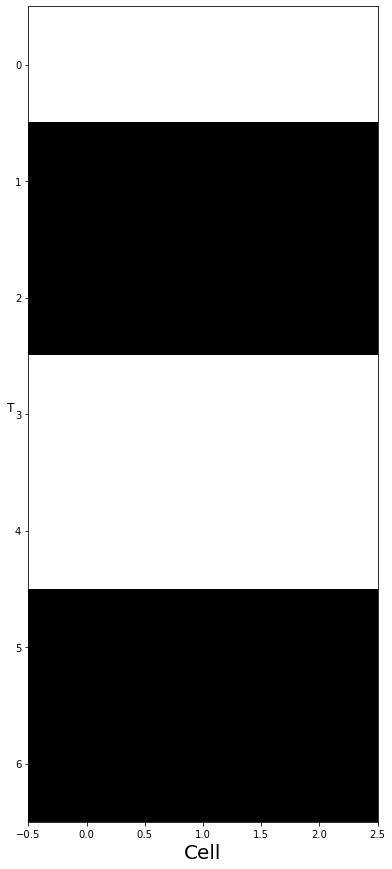

In [13]:
import matplotlib.pyplot as plt

def randarr(a):
    randomstate = []
    for x in range(a):
        rand = round(random()*1)
        randomstate += [rand]
    return randomstate

singlecell = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
threecells = [1, 0, 1]
six = [1, 0, 0, 1, 0, 1]
onelive = [0, 0, 0, 1, 0, 0, 0]
wide =[1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0]
rule = 1
iterations = 6
num_states = 3

###################################################################

##################################################################
#Edit this part to alter the run. the runcla.generations runs the entire class, and returns the arrays.
#the rule is just something that sticks from the 1d CA part. 

runcla = CLA(num_states, [0,0,0], rule, iterations)
fig, ax = plt.subplots(figsize=(15,15 ))


###################################################################
ax.set_ylabel('T', rotation=0, va="bottom", fontsize=12)
ax.set_xlabel('Cell', fontsize=20)
ax.imshow(runcla.generations, cmap='binary')
###################################################################
#print(runcla.generations)